In [4]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
# import statements for the classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [5]:
df = pd.read_csv("train.csv")
df2=pd.read_csv("event_type.csv")
df3= pd.read_csv("resource_type.csv")
df4=pd.read_csv("severity_type.csv")
df5=pd.read_csv("log_feature.csv")
dfArray=np.array([df2,df3,df4,df5])
dfArray[0].head()
df.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [6]:
#Data merging to create a single record (CAR)..Merge all dataframes having 'id' as the key excluding dataframe
#created from train
count = 0
for array in dfArray:
    count+=1
    if count==1:
       temp=array
    else:
       temp = temp.merge(array, on='id', how='inner', suffixes=('_1', '_2'))

In [7]:
temp.head()
#temp.loc[0 , :]

,id,event_type,resource_type,severity_type,log_feature,volume
0,6597,event_type 11,resource_type 8,severity_type 2,feature 68,6
1,8011,event_type 15,resource_type 8,severity_type 2,feature 68,7
2,2597,event_type 15,resource_type 8,severity_type 2,feature 68,1
3,5022,event_type 15,resource_type 8,severity_type 1,feature 172,2
4,5022,event_type 15,resource_type 8,severity_type 1,feature 56,1


Data cleansing starts

In [8]:
#Method to Remove text from variables
#better method with apply
def cleanse(str,keyword):
    if keyword in str:
        return str.replace(keyword,"")

In [9]:
#Method2 to Remove text from variables
def stripOffText(str):
    if 'severity_type_' in str:
        return str.replace('severity_type_',"")
    if 'resource_type_' in str:
        return str.replace('resource_type_',"")
    if 'event_type_' in str:
        return str.replace('event_type_',"")
    if 'log_feature_' in str:
        return str.replace('log_feature_',"")
    

In [10]:
#Remove text from variables
temp['severity_type'] = temp.apply(lambda row: cleanse(row['severity_type'], 'severity_type'), axis=1)
temp['resource_type'] = temp.apply(lambda row: cleanse(row['resource_type'], 'resource_type'), axis=1)
temp['event_type'] = temp.apply(lambda row: cleanse(row['event_type'], 'event_type'), axis=1)
temp['log_feature'] = temp.apply(lambda row: cleanse(row['log_feature'], 'feature'), axis=1)
temp.head()


,id,event_type,resource_type,severity_type,log_feature,volume
0,6597,11,8,2,68,6
1,8011,15,8,2,68,7
2,2597,15,8,2,68,1
3,5022,15,8,1,172,2
4,5022,15,8,1,56,1


In [11]:
temp1=df
#cleanse temp1 train data frame
temp1['location'] = temp1.apply(lambda row: cleanse(row['location'], 'location'), axis=1)
#Merge train Dataframe with combined data frame temp
result_df = temp1.merge(temp, on='id', how='inner', suffixes=('_1', '_2'))
result_df.head()


,id,location,fault_severity,event_type,resource_type,severity_type,log_feature,volume
0,14121,118,1,34,2,2,312,19
1,14121,118,1,34,2,2,232,19
2,14121,118,1,35,2,2,312,19
3,14121,118,1,35,2,2,232,19
4,9320,91,0,34,2,2,315,200


In [12]:

# Convert to categorical data columns by converting datatypes of columns to integers
result_df['event_type'] = result_df['event_type'].astype(int)
result_df['severity_type'] = result_df['severity_type'].astype(int)
result_df['resource_type'] = result_df['resource_type'].astype(int)
result_df['log_feature'] = result_df['log_feature'].astype(int)
result_df['location'] = result_df['location'].astype(int)
#result_df=result_df.assign(resource_event=(result_df['resource_type']*result_df['event_type']/result_df['severity_type']))
#result_df=result_df.assign(log_event=(result_df['log_feature']/result_df['event_type']))
#result_df.info()
#df.info()
#result_df.describe()
#result_df.corr(method='spearman')
result_df.info()
#df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
id                61839 non-null int64
location          61839 non-null int32
fault_severity    61839 non-null int64
event_type        61839 non-null int32
resource_type     61839 non-null int32
severity_type     61839 non-null int32
log_feature       61839 non-null int32
volume            61839 non-null int64
dtypes: int32(5), int64(3)
memory usage: 3.1 MB


Data Analysis:


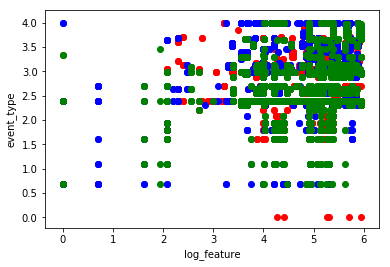

In [13]:
#Scatter plot not useful for categorical vs categorical
plt.scatter( np.log(result_df[result_df['fault_severity']==0].log_feature.values), np.log(result_df[result_df['fault_severity']==0].event_type.values),color="red")
plt.scatter( np.log(result_df[result_df['fault_severity']==1].log_feature.values), np.log(result_df[result_df['fault_severity']==1].event_type.values),color="blue")
plt.scatter( np.log(result_df[result_df['fault_severity']==2].log_feature.values), np.log(result_df[result_df['fault_severity']==2].event_type.values),color="green")
plt.xlabel("log_feature")
plt.ylabel("event_type")
plt.show()

In [14]:
#Scale log_feature and try scatter



In [15]:
result_df['volume'].values

array([19, 19, 19, ...,  1,  1,  1], dtype=int64)

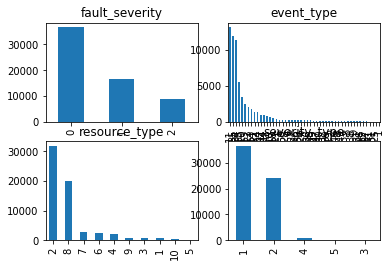

In [16]:
#Plot feature vs frequency
fig = plt.figure()
fig11 = fig.add_subplot(221)
fig11=result_df['fault_severity'].value_counts().plot(kind = 'bar',title="fault_severity")
fig12 = fig.add_subplot(222)
fig12=result_df['event_type'].value_counts().plot(kind = 'bar',title="event_type")
fig21 = fig.add_subplot(223)
fig21=result_df['resource_type'].value_counts().plot(kind = 'bar',title="resource_type")
fig22 = fig.add_subplot(224)
fig22=result_df['severity_type'].value_counts().plot(kind = 'bar',title="severity_type")


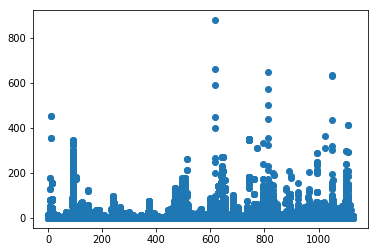

In [17]:
#Check for outliers
plt.scatter(result_df['location'],result_df['volume'])
#result_df=result_df[result_df['volume']<400]


In [18]:
#chi-square test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(result_df,result_df['fault_severity'])
type(X_kbest)

# Show results
print('Original number of features:', result_df.shape[1])
print('Reduced number of features:', X_kbest.shape[1])
X_kbest


Original number of features: 8
Reduced number of features: 2


array([[14121,   118],
       [14121,   118],
       [14121,   118],
       ..., 
       [17067,   885],
       [17067,   885],
       [17067,   885]], dtype=int64)

In [19]:
#Spearman corr for numerical vs categorical
result_df.corr(method='spearman')
#location event_type ,resource_type and severity_type and log_feature are slightly related

,id,location,fault_severity,event_type,resource_type,severity_type,log_feature,volume
id,1.000000,-0.027298,-0.035930,0.019441,-0.013694,0.027083,-0.010111,-0.002106
location,-0.027298,1.000000,0.271742,-0.383049,0.429917,-0.424742,-0.304589,0.071210
fault_severity,-0.035930,0.271742,1.000000,-0.261497,0.290473,-0.360594,-0.238632,-0.046634
event_type,0.019441,-0.383049,-0.261497,1.000000,-0.596874,0.414419,0.523528,0.091495
resource_type,-0.013694,0.429917,0.290473,-0.596874,1.000000,-0.392140,-0.491933,-0.043653
severity_type,0.027083,-0.424742,-0.360594,0.414419,-0.392140,1.000000,0.382624,0.126415
log_feature,-0.010111,-0.304589,-0.238632,0.523528,-0.491933,0.382624,1.000000,0.043322
volume,-0.002106,0.071210,-0.046634,0.091495,-0.043653,0.126415,0.043322,1.000000


In [20]:
#Check for missing columns and rows
result_df.isnull().sum()
#could Drop id and fault_severity..location and id related from chi-square test 
result_df=result_df.drop(['fault_severity'],axis=1)
#result_df=result_df.drop(['location'],axis=1)
result_df.head()

,id,location,event_type,resource_type,severity_type,log_feature,volume
0,14121,118,34,2,2,312,19
1,14121,118,34,2,2,232,19
2,14121,118,35,2,2,312,19
3,14121,118,35,2,2,232,19
4,9320,91,34,2,2,315,200


In [21]:
#Normalize feautures
# Volume feature
mean=np.mean(np.asarray(result_df['volume']))
std=np.std(np.asarray(result_df['volume']))
result_df['volume']=(result_df['volume'] - mean)/std
#Add new feature
#result_df=result_df.assign(loc_sev=result_df['location']/result_df['severity_type'])
result_df.head()


,id,location,event_type,resource_type,severity_type,log_feature,volume
0,14121,118,34,2,2,312,0.463257
1,14121,118,34,2,2,232,0.463257
2,14121,118,35,2,2,312,0.463257
3,14121,118,35,2,2,232,0.463257
4,9320,91,34,2,2,315,8.366392


In [22]:
#Dumify all the categorical data columns..
df_with_dummies = pd.get_dummies( result_df, columns = ['location','resource_type','event_type','severity_type','log_feature'],drop_first=True )
df_with_dummies.head()


,id,volume,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,...,log_feature_371,log_feature_373,log_feature_374,log_feature_375,log_feature_376,log_feature_377,log_feature_378,log_feature_380,log_feature_383,log_feature_384
0,14121,0.463257,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14121,0.463257,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14121,0.463257,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14121,0.463257,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9320,8.366392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Get list of all column_names
li=list(df_with_dummies.columns.values)
len(li)
li2=list(result_df.columns.values)
li2

['id',
 'location',
 'event_type',
 'resource_type',
 'severity_type',
 'log_feature',
 'volume']

In [24]:
#Create a new column_names list
li_new=[]
count=0
for i in li:
    if i=='id' or i=='volume':
        li_new.append(i)
    else:
        li_new.append(count)
        count+=1
        
        
        
len(li_new)
#li_new
            

1321

In [25]:
df_grouped=pd.DataFrame(df_with_dummies.groupby(['id'],as_index=False,sort=False)[li[1:]].sum(),dtype=int)
df_grouped
result_df_grouped=pd.DataFrame(result_df.groupby(['id'],as_index=False,sort=False)[li2[1:]].max(),dtype=int)
result_df_grouped
#fault_severity
#df_fault_severity=df_grouped['fault_severity']
#df_grouped=df_grouped.drop(['fault_severity'],axis=1)
#df_grouped.columns=li_new
#df_grouped.head()
#df_grouped.describe()
#df_grouped.volume.hist(bins=30)
#df_grouped.volume.plot()
#plt.scatter(df['location'],df_grouped['volume'])


,id,location,event_type,resource_type,severity_type,log_feature,volume
0,14121,118,35,2,2,312,0
1,9320,91,35,2,2,315,8
2,14394,152,35,2,2,301,0
3,8218,931,15,8,1,203,0
4,14804,120,36,8,1,237,0
5,1080,664,11,8,1,171,0
6,9731,640,50,2,4,374,0
7,15505,122,35,2,2,315,0
8,3443,263,35,2,2,312,0
9,13300,613,54,8,1,82,0


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result_df_grouped, df['fault_severity'], test_size=0.20,random_state = 2)
X_train.head()

,id,location,event_type,resource_type,severity_type,log_feature,volume
1608,16438,829,11,8,1,171,0
5770,9458,242,35,2,2,312,0
3438,10173,891,11,8,1,195,3
1549,7956,3,11,8,1,171,0
289,17883,744,14,8,1,273,0


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [73]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

In [71]:
# TODO: Import 'r2_score'
from sklearn.metrics import f1_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = f1_score(y_true,y_predict,average='micro')
    
    # Return the score
    return score

In [88]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = GradientBoostingClassifier(random_state=42,n_estimators=10)

# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(performance_metric)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', performance_metric(best_train_predictions, y_train))
print('The testing F1 Score is', performance_metric(best_test_predictions, y_test))

# Plot the new model.
#plot_model(X, y, best_clf)

# Let's also explore what parameters ended up being used in the new model.
best_clf

The training F1 Score is 0.789972899729
The testing F1 Score is 0.716316858497


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [123]:
X = result_df_grouped['volume']
y=  df['fault_severity']
plot_model(X,y, best_clf)


ValueError: Can only tuple-index with a MultiIndex

C:\Users\phani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\phani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


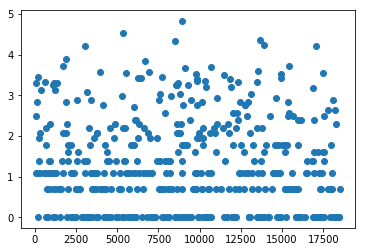

In [26]:
#visualize
plt.scatter(X_test['id'],np.log(X_test['volume']))
#plt.plot(df_grouped['volume'],classifier.predict(df_grouped),color='blue',linewidth=3)

In [90]:
classifier_score = best_clf.score(X_test, y_test)
print("SignalSeverityModel",classifier_score)


SignalSeverityModel 0.716316858497


In [91]:
#Precision Recall metrics for classification
from sklearn.metrics import classification_report
y_true = df['fault_severity']
y_pred=best_clf.predict(result_df_grouped)
target_names = ['fault_severity_0', 'fault_severity_1', 'fault_severity_2']
print(classification_report(y_true, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

fault_severity_0       0.84      0.90      0.87      4784
fault_severity_1       0.62      0.57      0.59      1871
fault_severity_2       0.65      0.50      0.56       726

     avg / total       0.77      0.78      0.77      7381



In [119]:
#Test with known value
pred=best_clf.predict(df_grouped[df_grouped['volume']==19])
#len(pred)
pred

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 1321 

In [120]:
probas = best_clf.predict_proba(df_grouped)
location=result_df_grouped['location']
n_classes = np.unique(y_pred).size
probas[:,0]


ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 1321 

In [ ]:
#Create a new dataframe with location,probabilities,y_pred
arr=[location,probas[:,0],probas[:,1],probas[:,2],y_pred,y_true]
arr=np.array(arr)
cols = ['location','fault_severity_0','fault_severity_1','fault_severity_2','y_pred','y_true']
df_final = pd.DataFrame(arr.T,columns=cols)
df_final

In [ ]:
df_final.to_csv('output.csv', sep='\t', encoding='utf-8')

In [1]:
!pip install xgboost-0.7-cp36-cp36m-win_amd64.whl

Processing c:\users\phani\pbl0\xgboost-0.7-cp36-cp36m-win_amd64.whl


Requirement 'xgboost-0.7-cp36-cp36m-win_amd64.whl' looks like a filename, but the file does not exist
Exception:
Traceback (most recent call last):
  File "C:\Users\phani\Anaconda3\lib\site-packages\pip\basecommand.py", line 215, in main
    status = self.run(options, args)
  File "C:\Users\phani\Anaconda3\lib\site-packages\pip\commands\install.py", line 335, in run
    wb.build(autobuilding=True)
  File "C:\Users\phani\Anaconda3\lib\site-packages\pip\wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "C:\Users\phani\Anaconda3\lib\site-packages\pip\req\req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "C:\Users\phani\Anaconda3\lib\site-packages\pip\req\req_set.py", line 620, in _prepare_file
    session=self.session, hashes=hashes)
  File "C:\Users\phani\Anaconda3\lib\site-packages\pip\download.py", line 809, in unpack_url
    unpack_file_url(link, location, download_dir, hashes=hashes)
  File "C:\Use